In [1]:
import pickle
import os
from lagrangebench.evaluate import averaged_metrics
import numpy as np
import matplotlib.pyplot as plt

2024-03-21 22:00:38.477204: W external/xla/xla/service/gpu/nvptx_compiler.cc:703] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.52). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
def cumulative_average(numbers):
    numbers = np.array(numbers)
    cum_sum = np.cumsum(numbers)
    indices = np.arange(1, len(numbers) + 1)
    cum_avg = cum_sum / indices
    return cum_avg.tolist()

In [3]:
name_of_file = 'acdm_rpf2d_20240316-000844_metrics_ms.pkl'
metrics = pickle.load(open('./thesis_results/multiple_samples/'+name_of_file, 'rb'))

In [6]:
cumulative_average_of_mse = []
cumulative_average_of_ekin = []
cumulative_average_of_sinkhorn = []
for rollout in metrics.values():
    for k, v in rollout.items():
        #determine the cumulative average of the metrics
        if k =='mse':
            cumulative_average_of_mse.append(cumulative_average(v))
        
        if k =='e_kin':
            cumulative_average_of_ekin.append(cumulative_average(v['predicted']))
            
        if k =='sinkhorn':
            cumulative_average_of_sinkhorn.append(cumulative_average(v))

cumulative_average_of_mse = np.array(cumulative_average_of_mse)
cumulative_average_of_ekin = np.array(cumulative_average_of_ekin)
cumulative_average_of_sinkhorn = np.array(cumulative_average_of_sinkhorn)

column_mean_position = np.mean(cumulative_average_of_mse, axis=0)
column_std_position = np.std(cumulative_average_of_mse, axis=0)

column_mean_ekin = np.mean(cumulative_average_of_ekin, axis=0)
column_std_ekin = np.std(cumulative_average_of_ekin, axis=0)

column_mean_sinkhorn = np.mean(cumulative_average_of_sinkhorn, axis=0)
column_std_sinkhorn = np.std(cumulative_average_of_sinkhorn, axis=0)

column_mean=[column_mean_position, column_mean_ekin, column_mean_sinkhorn]  
column_std = [column_std_position, column_std_ekin, column_std_sinkhorn]

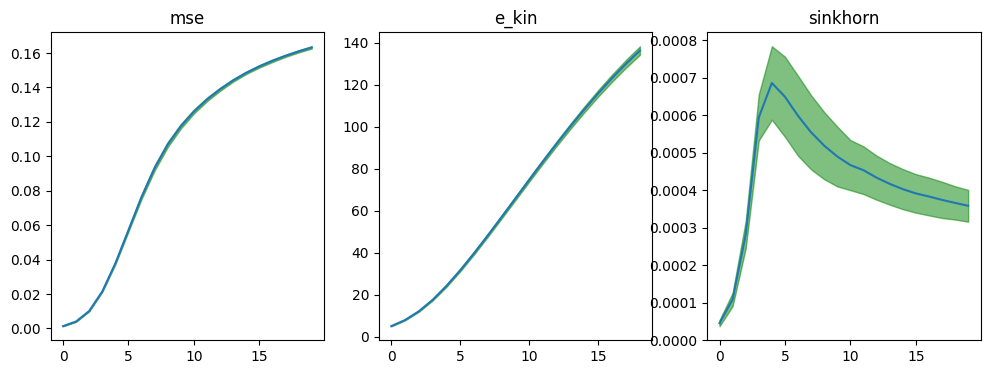

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i,m in enumerate(['mse', 'e_kin', 'sinkhorn']):

    ax[i].plot(np.arange(len(column_mean[i])),column_mean[i])
    ax[i].fill_between(x=np.arange(len(column_mean[i])),y1=column_mean[i] - column_std[i], 
                       y2=column_mean[i] + column_std[i], color='green', 
                       alpha=0.5, label='Standard Deviation')
    ax[i].set_title(m)